In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Importing data

In [2]:
df = pd.read_csv("covtype.data")
df.head(5)

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [3]:
df.rename(
    columns={
        "2596": "Elevation",
        "51": "Aspect",
        "3": "Slope",
        "258": "Horizontal_Distance_To_Hydrology",
        "0": "Vertical_Distance_To_Hydrology",
        "510": "Horizontal_Distance_To_Roadways",
        "221": "Hillshade_9am",
        "232": "Hillshade_Noon",
        "148": "Hillshade_3pm",
        "6279": "Horizontal_Distance_To_Fire_Points",
        "5": "Cover_Type"
    },
    inplace=True
)
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
5,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
6,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
7,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
8,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5
9,2612,201,4,180,51,735,218,243,161,6222,...,0,0,0,0,0,0,0,0,0,5


# Observation

## Correlation matrix

<AxesSubplot:>

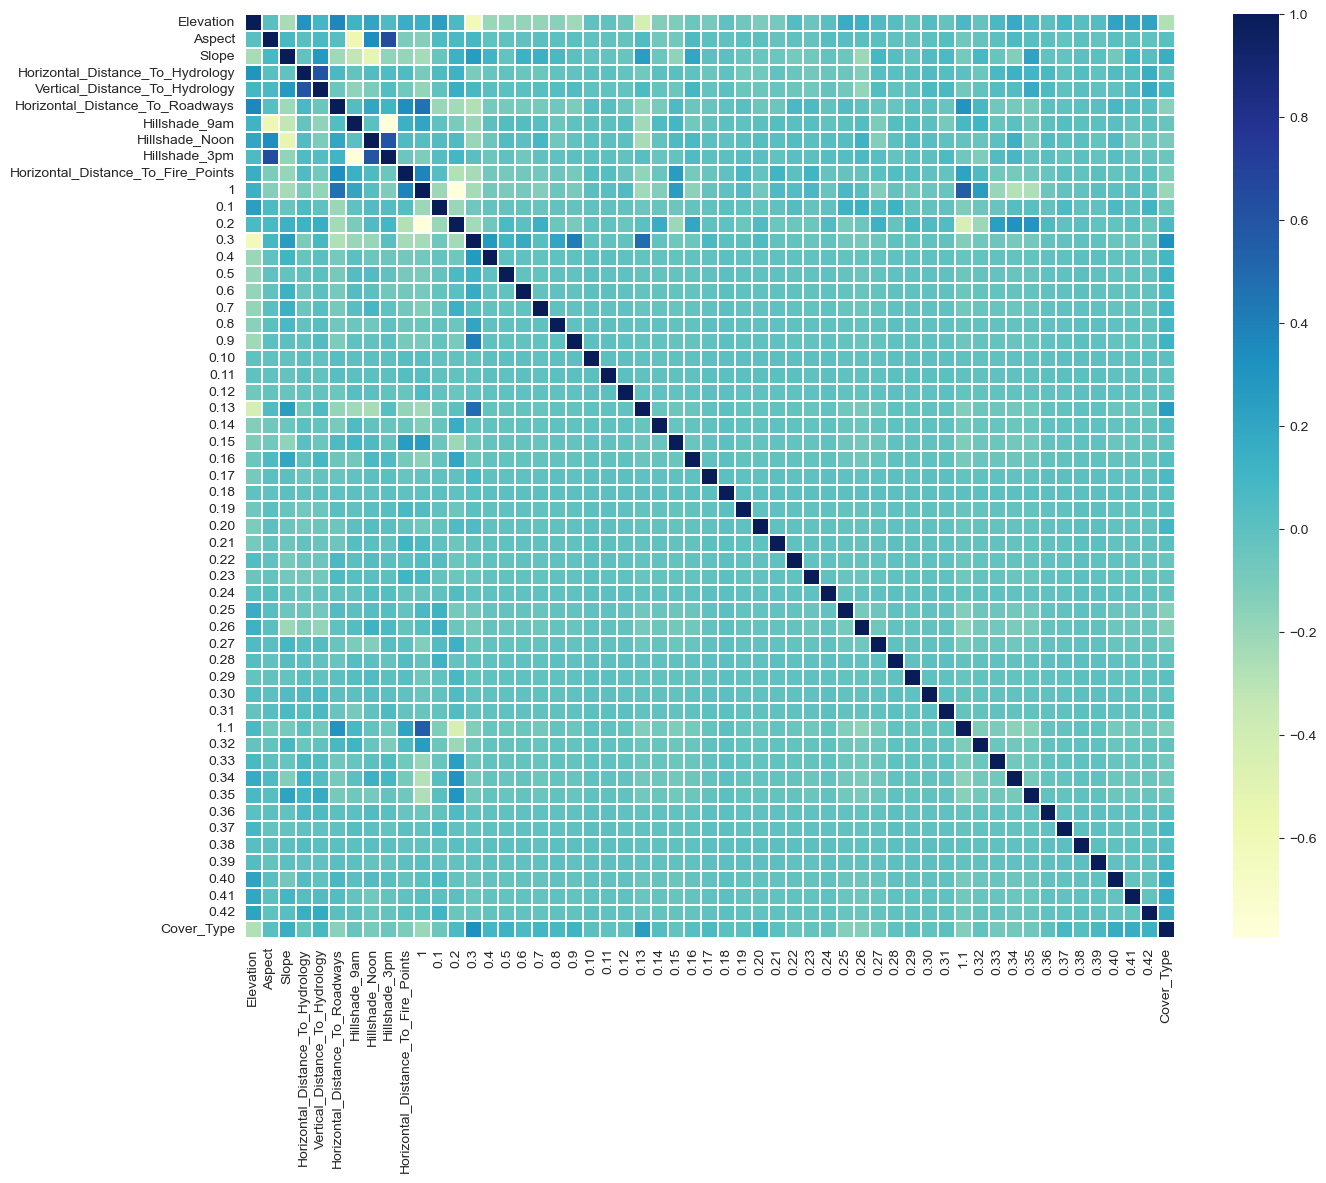

In [4]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df.corr(), ax=ax, cmap="YlGnBu", linewidths=0.1)

## Balance

<AxesSubplot:ylabel='Cover_Type'>

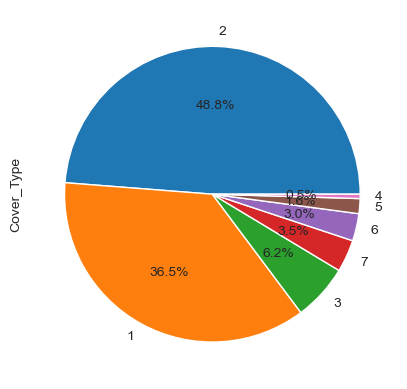

In [5]:
df["Cover_Type"].value_counts().plot.pie(autopct='%1.1f%%')

# Train

## Split bc data is massive

In [6]:
df = df.sample(frac=0.1)

In [7]:
X = df.iloc[:, 0:-1]
y = df["Cover_Type"]

## Oversample

2    28395
7    28395
1    28395
3    28395
6    28395
5    28395
4    28395
Name: Cover_Type, dtype: int64

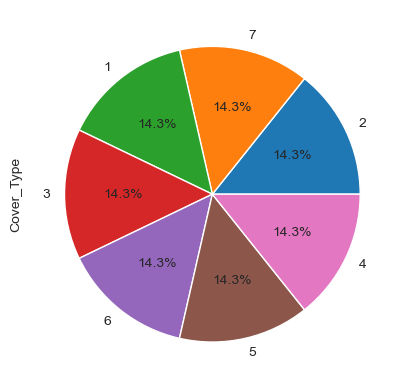

In [8]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)
y.value_counts().plot.pie(autopct='%1.1f%%')
y.value_counts()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print("Number of train dataset: ", X_train.shape)
print("Number of test dataset: ", y_test.shape)

Number of train dataset:  (149073, 54)
Number of test dataset:  (49692,)


## Scaling

In [10]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
normalized_train_X = normalizer.fit_transform(X_train)
normalized_test_X = normalizer.transform(X_test)

# Models

## Logistic Regression

### Default

In [11]:
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(np.unique(y_pred))

              precision    recall  f1-score   support

           1       0.62      0.57      0.60      7145
           2       0.47      0.42      0.45      6934
           3       0.55      0.44      0.49      7191
           4       0.77      0.81      0.79      7117
           5       0.60      0.68      0.64      7142
           6       0.54      0.60      0.57      7032
           7       0.81      0.90      0.85      7131

    accuracy                           0.63     49692
   macro avg       0.62      0.63      0.63     49692
weighted avg       0.62      0.63      0.63     49692

[1 2 3 4 5 6 7]


/Users/mymytre/opt/miniconda3/envs/data-science/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Normalized

In [12]:
lr = LogisticRegression(max_iter=1000)
model = lr.fit(normalized_train_X, y_train)
y_pred = model.predict(normalized_test_X)

print(classification_report(y_test, y_pred))
print(np.unique(y_pred))

              precision    recall  f1-score   support

           1       0.40      0.30      0.34      7145
           2       0.40      0.32      0.36      6934
           3       0.45      0.38      0.41      7191
           4       0.69      0.85      0.76      7117
           5       0.50      0.44      0.47      7142
           6       0.37      0.38      0.38      7032
           7       0.52      0.75      0.61      7131

    accuracy                           0.49     49692
   macro avg       0.47      0.49      0.47     49692
weighted avg       0.47      0.49      0.47     49692

[1 2 3 4 5 6 7]


### H-TUNE

In [67]:
from sklearn.model_selection import RandomizedSearchCV

lr = LogisticRegression(max_iter=1000)
#TODO NOT WORKING!!!!!!!
random_rf = RandomizedSearchCV(estimator=lr,
                               param_distributions=param_vals)

model = lr.fit(normalized_train_X, y_train)
y_pred = model.predict(normalized_test_X)

print(classification_report(y_test, y_pred))
print(np.unique(y_pred))

TypeError: RandomizedSearchCV.__init__() missing 1 required positional argument: 'param_distributions'

### Confusion matrix

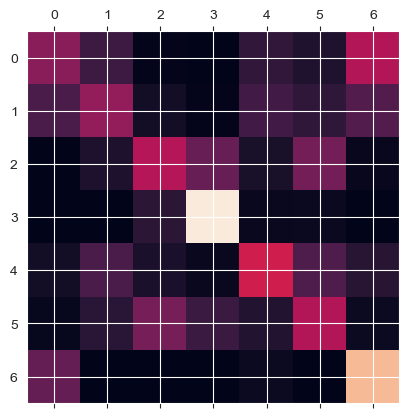

In [18]:
from sklearn.metrics import confusion_matrix

plt.matshow(confusion_matrix(y_test, y_pred))

# Random Forrest

In [60]:
from sklearn.ensemble import RandomForestClassifier

# create the classifier
rf = RandomForestClassifier(n_estimators=100)

model = rf.fit(normalized_train_X, y_train)
y_pred = model.predict(normalized_test_X)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.91      0.92      7145
           2       0.92      0.90      0.91      6934
           3       0.98      0.99      0.98      7191
           4       1.00      1.00      1.00      7117
           5       0.99      1.00      0.99      7142
           6       0.98      0.99      0.99      7032
           7       0.99      1.00      0.99      7131

    accuracy                           0.97     49692
   macro avg       0.97      0.97      0.97     49692
weighted avg       0.97      0.97      0.97     49692

[1 2 3 4 5 6 7]


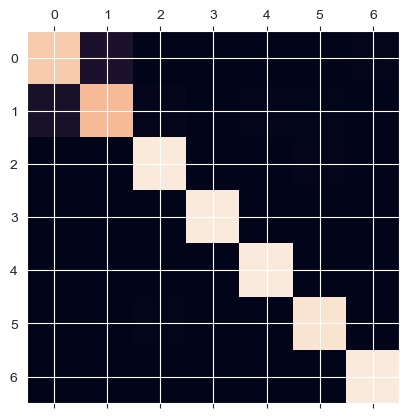

In [61]:
plt.matshow(confusion_matrix(y_test, y_pred))

# Decision tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

model = clf.fit(normalized_train_X, y_train)
y_pred = model.predict(normalized_test_X)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.84      0.85      7145
           2       0.84      0.82      0.83      6934
           3       0.96      0.96      0.96      7191
           4       0.99      1.00      1.00      7117
           5       0.97      0.99      0.98      7142
           6       0.96      0.97      0.96      7032
           7       0.98      0.99      0.99      7131

    accuracy                           0.94     49692
   macro avg       0.94      0.94      0.94     49692
weighted avg       0.94      0.94      0.94     49692



# K-Nearest Neighbors

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier().fit(X_train, y_train)

model = knc.fit(normalized_train_X, y_train)
y_pred = model.predict(normalized_test_X)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.82      0.82      7145
           2       0.86      0.67      0.75      6934
           3       0.95      0.98      0.96      7191
           4       0.99      1.00      1.00      7117
           5       0.94      1.00      0.97      7142
           6       0.95      0.99      0.97      7032
           7       0.94      1.00      0.97      7131

    accuracy                           0.92     49692
   macro avg       0.92      0.92      0.92     49692
weighted avg       0.92      0.92      0.92     49692



# Gaussian Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)

model = gnb.fit(normalized_train_X, y_train)
y_pred = model.predict(normalized_test_X)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.40      0.48      7145
           2       0.81      0.12      0.21      6934
           3       0.43      0.79      0.55      7191
           4       0.74      0.90      0.81      7117
           5       0.46      0.59      0.52      7142
           6       0.28      0.03      0.05      7032
           7       0.53      0.91      0.67      7131

    accuracy                           0.54     49692
   macro avg       0.55      0.53      0.47     49692
weighted avg       0.55      0.54      0.47     49692

